In [1]:
import pandas as pd

In [2]:
links=[]
dates=['190323','190330','190406','190413','190420','190427','190504','190511','190518','190525','190601']
links=[f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt" for date in dates]
print (links[0])
print(len(links))

http://web.mta.info/developers/data/nyct/turnstile/turnstile_190323.txt
11


In [3]:
df0=pd.read_csv(links[0])
df1=pd.read_csv(links[1])
df2=pd.read_csv(links[2])
df3=pd.read_csv(links[3])
df4=pd.read_csv(links[4])
df5=pd.read_csv(links[5])
df6=pd.read_csv(links[6])
df7=pd.read_csv(links[7])
df8=pd.read_csv(links[8])
df9=pd.read_csv(links[9])
df10=pd.read_csv(links[10])

mta_df=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

In [4]:
mta_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667


In [5]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248180 entries, 0 to 203794
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [6]:
mta_df["DATETIME"]=pd.to_datetime(mta_df["DATE"]+" "+mta_df["TIME"],infer_datetime_format=True)

In [7]:
mta_df.rename(columns={"C/A":"CA"}, inplace=True)
mta_df.columns=[column.strip() for column in mta_df.columns]
mta_df.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME'],
      dtype='object')

In [8]:
mta_df.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,20:00:00,REGULAR,6981415,2367704,2019-03-16 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,00:00:00,REGULAR,6981564,2367731,2019-03-17 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,04:00:00,REGULAR,6981579,2367731,2019-03-17 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,08:00:00,REGULAR,6981587,2367743,2019-03-17 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,12:00:00,REGULAR,6981655,2367794,2019-03-17 12:00:00


In [9]:
dupes=mta_df[mta_df.duplicated()]
dupes

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME


In [10]:
mta_df["TURNSTILE"]=mta_df["CA"]+" "+mta_df["UNIT"]+" "+mta_df["SCP"]+" "+mta_df["STATION"]
mta_df["TURNSTILE"].head()
mta_df.head(100)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00,A002 R051 02-00-00 59 ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A002,R051,02-03-00,59 ST,NQR456W,BMT,03/17/2019,20:00:00,REGULAR,1205949,4530807,2019-03-17 20:00:00,A002 R051 02-03-00 59 ST
96,A002,R051,02-03-00,59 ST,NQR456W,BMT,03/18/2019,00:00:00,REGULAR,1205996,4530883,2019-03-18 00:00:00,A002 R051 02-03-00 59 ST
97,A002,R051,02-03-00,59 ST,NQR456W,BMT,03/18/2019,04:00:00,REGULAR,1205998,4530886,2019-03-18 04:00:00,A002 R051 02-03-00 59 ST
98,A002,R051,02-03-00,59 ST,NQR456W,BMT,03/18/2019,08:00:00,REGULAR,1206006,4531129,2019-03-18 08:00:00,A002 R051 02-03-00 59 ST


In [11]:
mta_df.groupby(['TURNSTILE','DATETIME']).ENTRIES.count().reset_index().sort_values("ENTRIES",ascending=False)

,TURNSTILE,DATETIME,ENTRIES
1098548,N519 R461 00-03-01 B'WAY-LAFAYETTE,2019-03-24 01:00:00,2
325181,G009 R151 02-00-04 CONEY IS-STILLW,2019-05-16 17:00:00,2
1836664,R283 R221 00-00-00 167 ST,2019-04-15 16:00:00,2
1836663,R283 R221 00-00-00 167 ST,2019-04-15 12:00:00,2
1098547,N519 R461 00-03-01 B'WAY-LAFAYETTE,2019-03-23 21:00:00,2
...,...,...,...
749375,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 12:00:00,1
749374,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 08:00:00,1
749373,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 04:00:00,1
749372,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 00:00:00,1


In [12]:
mta_df.drop_duplicates(subset=["TURNSTILE","DATETIME"],inplace=True)
mta_df.groupby(['TURNSTILE','DATETIME']).ENTRIES.count().reset_index().sort_values("ENTRIES",ascending=False)

,TURNSTILE,DATETIME,ENTRIES
0,A002 R051 02-00-00 59 ST,2019-03-16 00:00:00,1
1498747,R142 R293 01-00-00 34 ST-PENN STA,2019-03-20 10:00:00,1
1498741,R142 R293 01-00-00 34 ST-PENN STA,2019-03-19 10:00:00,1
1498742,R142 R293 01-00-00 34 ST-PENN STA,2019-03-19 14:00:00,1
1498743,R142 R293 01-00-00 34 ST-PENN STA,2019-03-19 18:00:00,1
...,...,...,...
749365,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 20:00:00,1
749364,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 16:00:00,1
749363,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 12:00:00,1
749362,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 08:36:34,1


In [13]:
# Challenge 3:#
# Group the data so that it represents daily entries for each turnstile (hint: pd.groupby or DataFrame.groupby) #

daily_entries = mta_df.groupby(['CA','UNIT','SCP','STATION','TURNSTILE','DATE']).ENTRIES.max() -mta_df.groupby(['CA','UNIT','SCP','STATION','TURNSTILE','DATE']).ENTRIES.min()

In [14]:
daily_entries

CA     UNIT  SCP       STATION        TURNSTILE                          DATE      
A002   R051  02-00-00  59 ST          A002 R051 02-00-00 59 ST           03/16/2019     711
                                                                         03/17/2019     474
                                                                         03/18/2019    1286
                                                                         03/19/2019    1275
                                                                         03/20/2019    1345
                                                                                       ... 
TRAM2  R469  00-05-01  RIT-ROOSEVELT  TRAM2 R469 00-05-01 RIT-ROOSEVELT  05/27/2019       0
                                                                         05/28/2019       0
                                                                         05/29/2019       0
                                                                         05/30/2019     

In [15]:
daily_entries_new = daily_entries.reset_index()

In [16]:
daily_entries_new

,CA,UNIT,SCP,STATION,TURNSTILE,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/16/2019,711
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/17/2019,474
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/18/2019,1286
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/19/2019,1275
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/20/2019,1345
...,...,...,...,...,...,...,...
372196,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/27/2019,0
372197,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/28/2019,0
372198,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/29/2019,0
372199,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/30/2019,0


In [17]:
# Challenge 4: #
# plot the daily time series for a single turnstile #

%matplotlib inline

import matplotlib.pyplot as plt

In [18]:
X=daily_entries_new[daily_entries_new['TURNSTILE']=='A002 R051 02-00-00 59 ST']

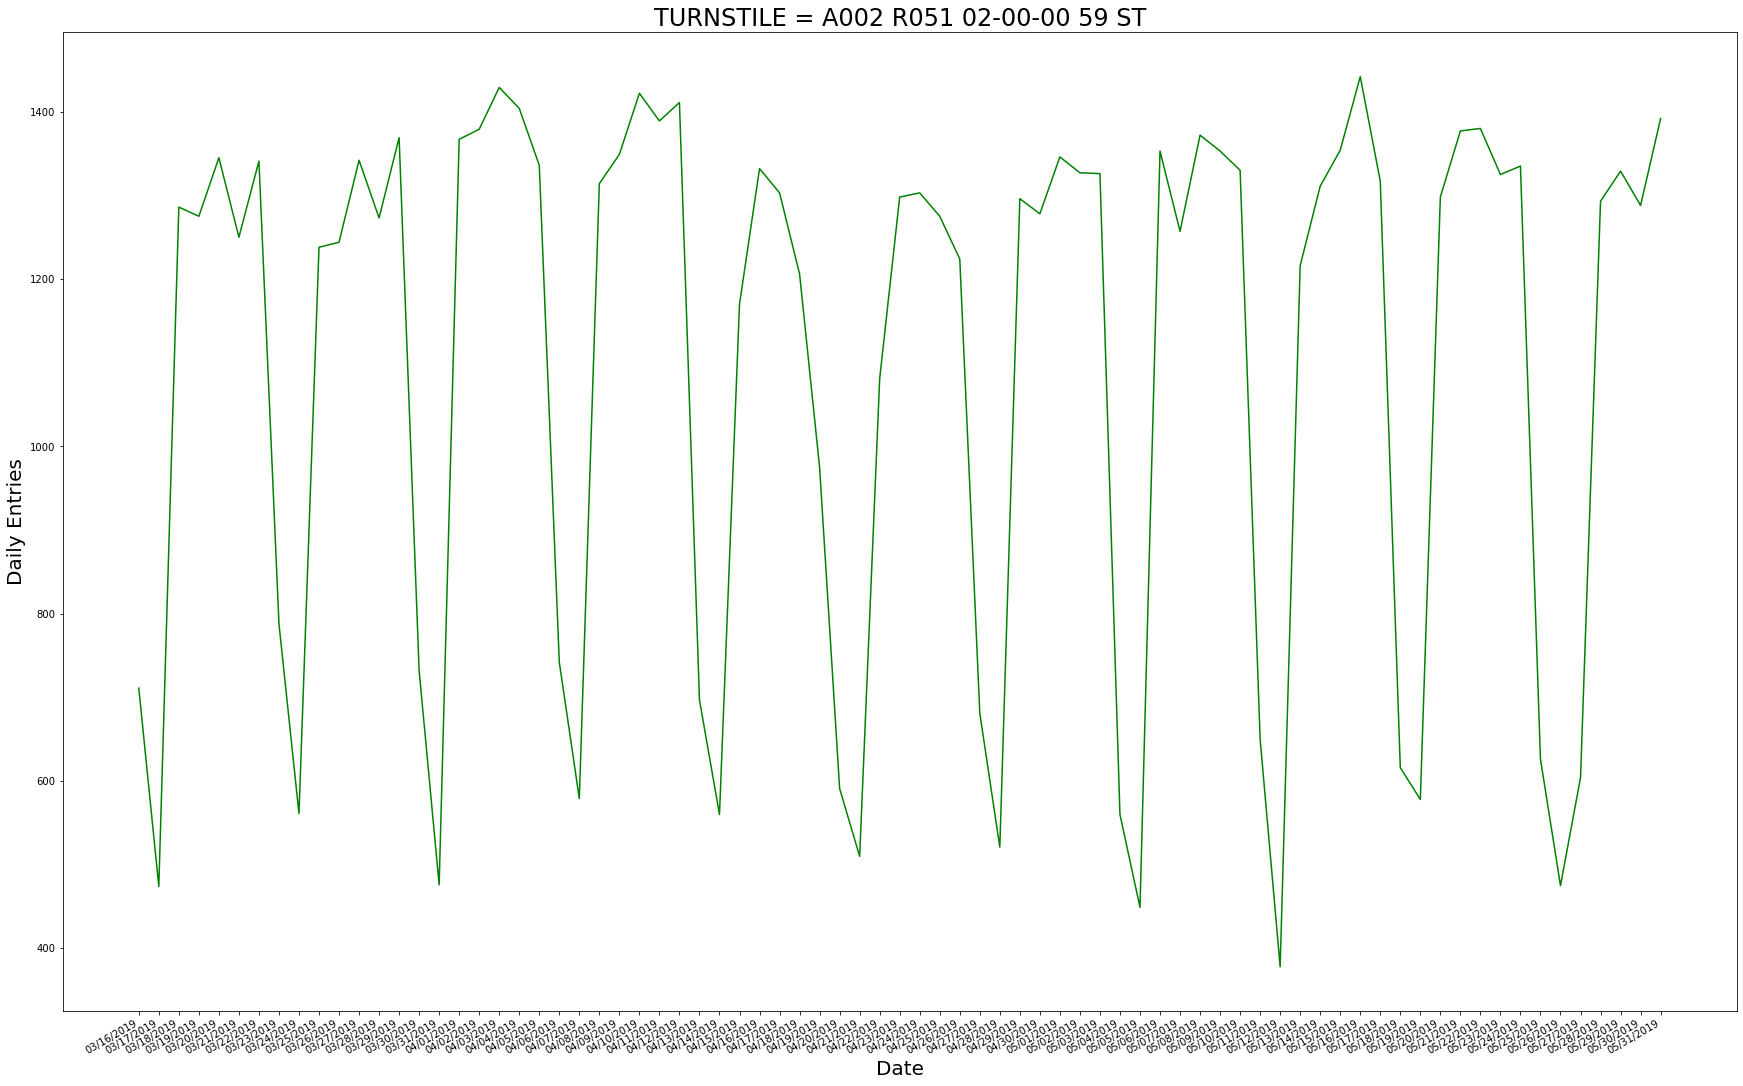

In [19]:
fig=plt.figure(figsize=(30,20))
plt.plot(X['DATE'],X['ENTRIES'],'g')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Daily Entries',fontsize=20)
plt.title('TURNSTILE = A002 R051 02-00-00 59 ST',fontsize=24)
fig.autofmt_xdate()
plt.show()

In [20]:
## Challenge 5: ##
## for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo ##

mta_bycombo = daily_entries_new.groupby(['CA','UNIT','STATION','DATE']).agg({'ENTRIES':'sum'}).reset_index()
mta_bycombo

,CA,UNIT,STATION,DATE,ENTRIES
0,A002,R051,59 ST,03/16/2019,6424
1,A002,R051,59 ST,03/17/2019,4888
2,A002,R051,59 ST,03/18/2019,10965
3,A002,R051,59 ST,03/19/2019,11337
4,A002,R051,59 ST,03/20/2019,11423
...,...,...,...,...,...
57127,TRAM2,R469,RIT-ROOSEVELT,05/27/2019,4012
57128,TRAM2,R469,RIT-ROOSEVELT,05/28/2019,2527
57129,TRAM2,R469,RIT-ROOSEVELT,05/29/2019,2786
57130,TRAM2,R469,RIT-ROOSEVELT,05/30/2019,3060


In [21]:
## Challenge 6: ##
## combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station ##

mta_bystation=mta_bycombo.groupby(['STATION','DATE']).agg({'ENTRIES':'sum'}).reset_index()
mta_bystation['STATION'].unique()

array(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '155 ST', '157 ST', '161/YANKEE STAD', '163 ST-AMSTERDM', '167 ST',
       '168 ST', '169 ST', '170 ST', '174 ST', '174-175 STS', '175 ST',
       '176 ST', '18 AV', '18 ST', '181 ST', '182-183 STS', '183 ST',
       '190 ST', '191 ST', '2 AV', '20 AV', '207 ST', '21 ST',
       '21 ST-QNSBRIDGE', '215 ST', '219 ST', '225 ST', '23 ST', '231 ST',
       '233 ST', '238 ST', '25 AV', '25 ST', '28 ST', '3 AV',
       '3 AV 138 ST', '3 AV-149 ST', '30 AV', '33 ST', '33 ST-RAWSON ST',
       '34 ST-HERALD SQ', '34 ST-HUDSON YD', '34 ST-PENN STA', '36 AV',
       '36 ST', '39 AV', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST', '46 ST',
       '46 ST BLISS ST', '47-50 STS ROCK

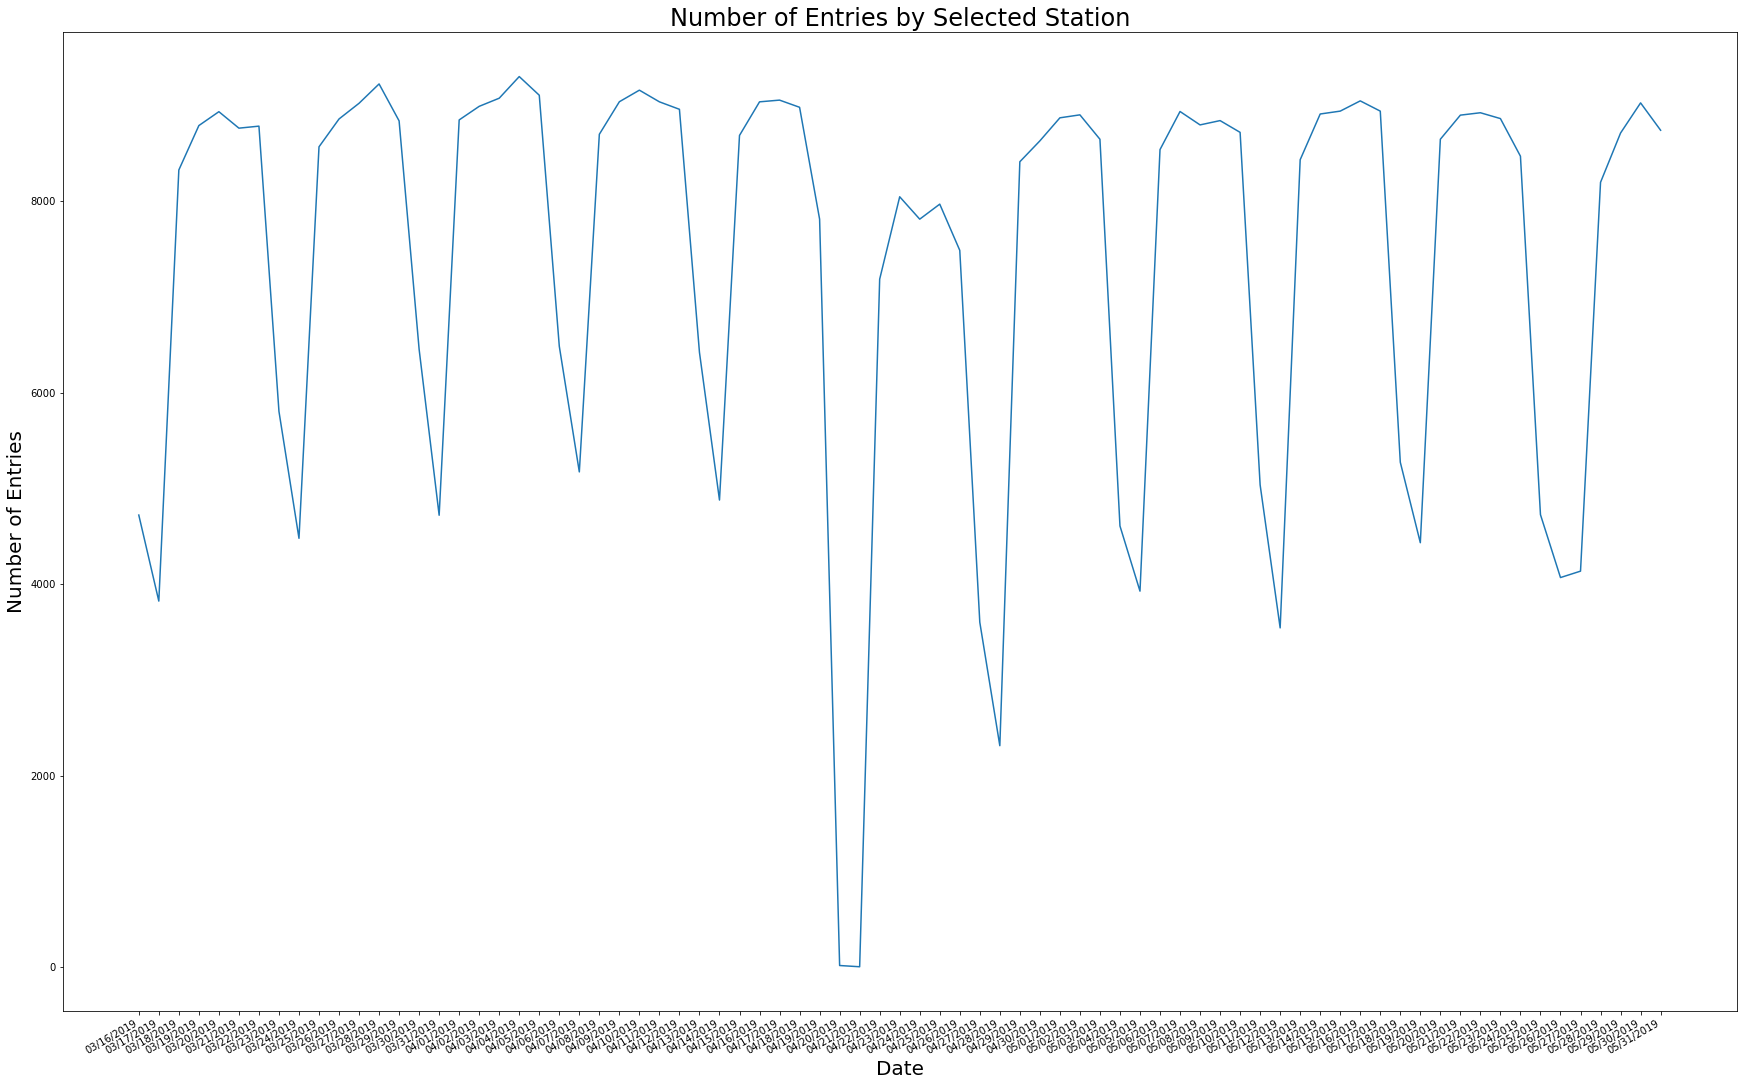

In [22]:
## Challenge 7: ##
## Plot the daily time series for a station ##

Station1=mta_bystation[mta_bystation['STATION']=='BEDFORD-NOSTRAN']

fig=plt.figure(figsize=(30,20))
plt.plot(Station1['DATE'],Station1['ENTRIES'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of Entries',fontsize=20)
plt.title('Number of Entries by Selected Station',fontsize=24)
fig.autofmt_xdate()
plt.show()

In [23]:
## Challenge 8 ##
## Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. ##


daily_entries_new['DATE']=pd.to_datetime(daily_entries_new['DATE'], errors='coerce')
daily_entries_new['WEEKDAY'] = daily_entries_new['DATE'].dt.day_name()
daily_entries_new['WEEKDAY_INDEX'] = daily_entries_new['DATE'].dt.weekday
daily_entries_new['WEEK_OF_YEAR']=daily_entries_new['DATE'].dt.week
daily_entries_new.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,CA,UNIT,SCP,STATION,TURNSTILE,DATE,ENTRIES,WEEKDAY,WEEKDAY_INDEX,WEEK_OF_YEAR
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-16,711,Saturday,5,11
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-17,474,Sunday,6,11
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-18,1286,Monday,0,12
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-19,1275,Tuesday,1,12
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-20,1345,Wednesday,2,12


In [24]:
Station2=daily_entries_new.query('STATION == "59 ST"').reset_index()

mta_byweek=Station2.groupby(['STATION','DATE','WEEK_OF_YEAR','WEEKDAY']).agg({'ENTRIES':'sum'}).reset_index()
mta_byweek

,STATION,DATE,WEEK_OF_YEAR,WEEKDAY,ENTRIES
0,59 ST,2019-03-16,11,Saturday,33268
1,59 ST,2019-03-17,11,Sunday,23277
2,59 ST,2019-03-18,12,Monday,57066
3,59 ST,2019-03-19,12,Tuesday,59998
4,59 ST,2019-03-20,12,Wednesday,60202
...,...,...,...,...,...
72,59 ST,2019-05-27,22,Monday,24153
73,59 ST,2019-05-28,22,Tuesday,58003
74,59 ST,2019-05-29,22,Wednesday,61256
75,59 ST,2019-05-30,22,Thursday,61771


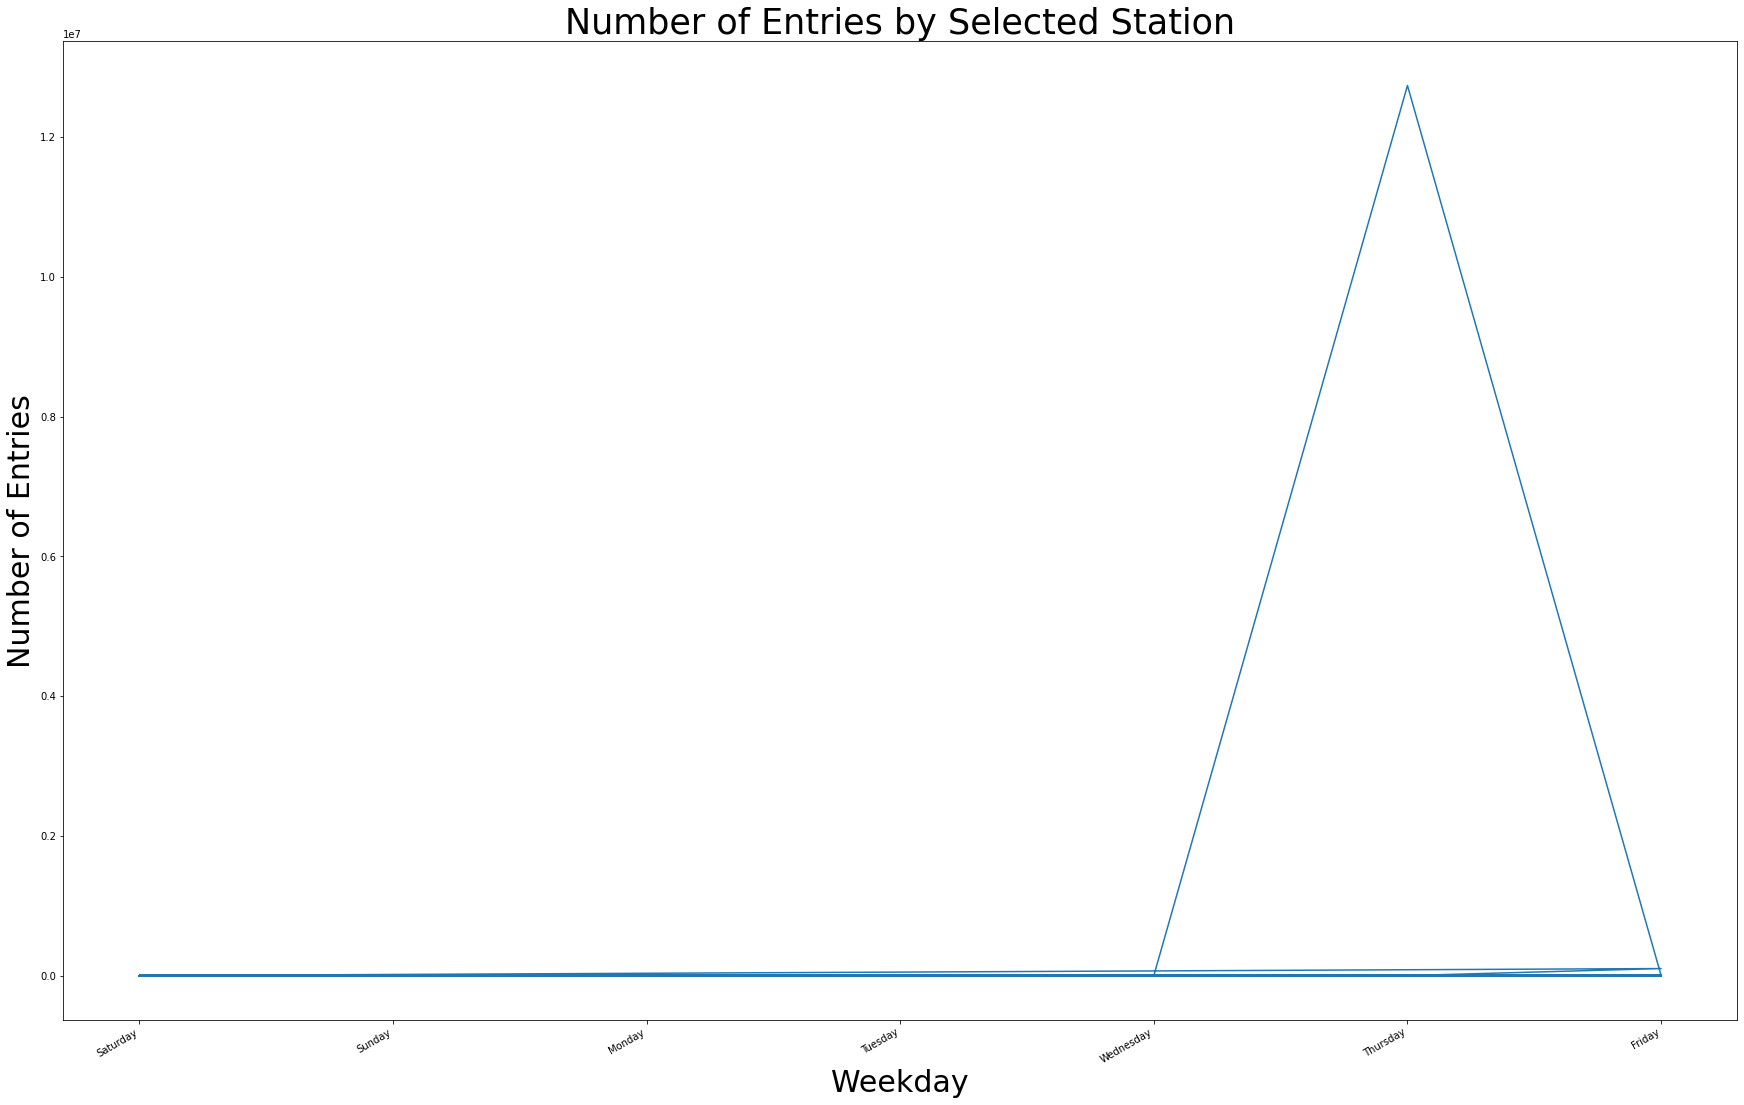

In [25]:
## This is not the correct way to plot, add a FOR loop later ##
fig=plt.figure(figsize=(30,20))
plt.plot(Station2['WEEKDAY'],Station2['ENTRIES'])
plt.xlabel('Weekday',fontsize=30)
plt.ylabel('Number of Entries',fontsize=30)
plt.title('Number of Entries by Selected Station',fontsize=35)
fig.autofmt_xdate()
plt.show()

In [ ]:
##Challenge 9##
##Over multiple weeks, sum total ridership for each station and sort them##

busiest_station = daily_entries_new.groupby(['Station']).sum()
busiest_station = busiest_turnstile_df.sort_values(by='Entries',ascending=False)
busiest_station.reset_index(inplace=True)
busiest_station.head(10)

In [ ]:
##Challenge 10##

plt.hist(busiest_station)